In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/car data.csv')

In [ ]:
df.shape

(301, 9)

In [ ]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [ ]:
#creating new feature bcz we need no of years for a car and not just year , this feature will help us find out the same by = current year-year
final_dataset['Current_Year']=2022

In [ ]:
final_dataset['no_of_year']=final_dataset['Current_Year']-final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [ ]:
#now year and current year is not required , therefore dropping it
final_dataset.drop(['Year'],axis=1,inplace=True)
final_dataset.drop(['Current_Year'],axis=1,inplace=True) #inplace because we need operation to take place like a permanent one

In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


In [ ]:
#finding correlation 
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


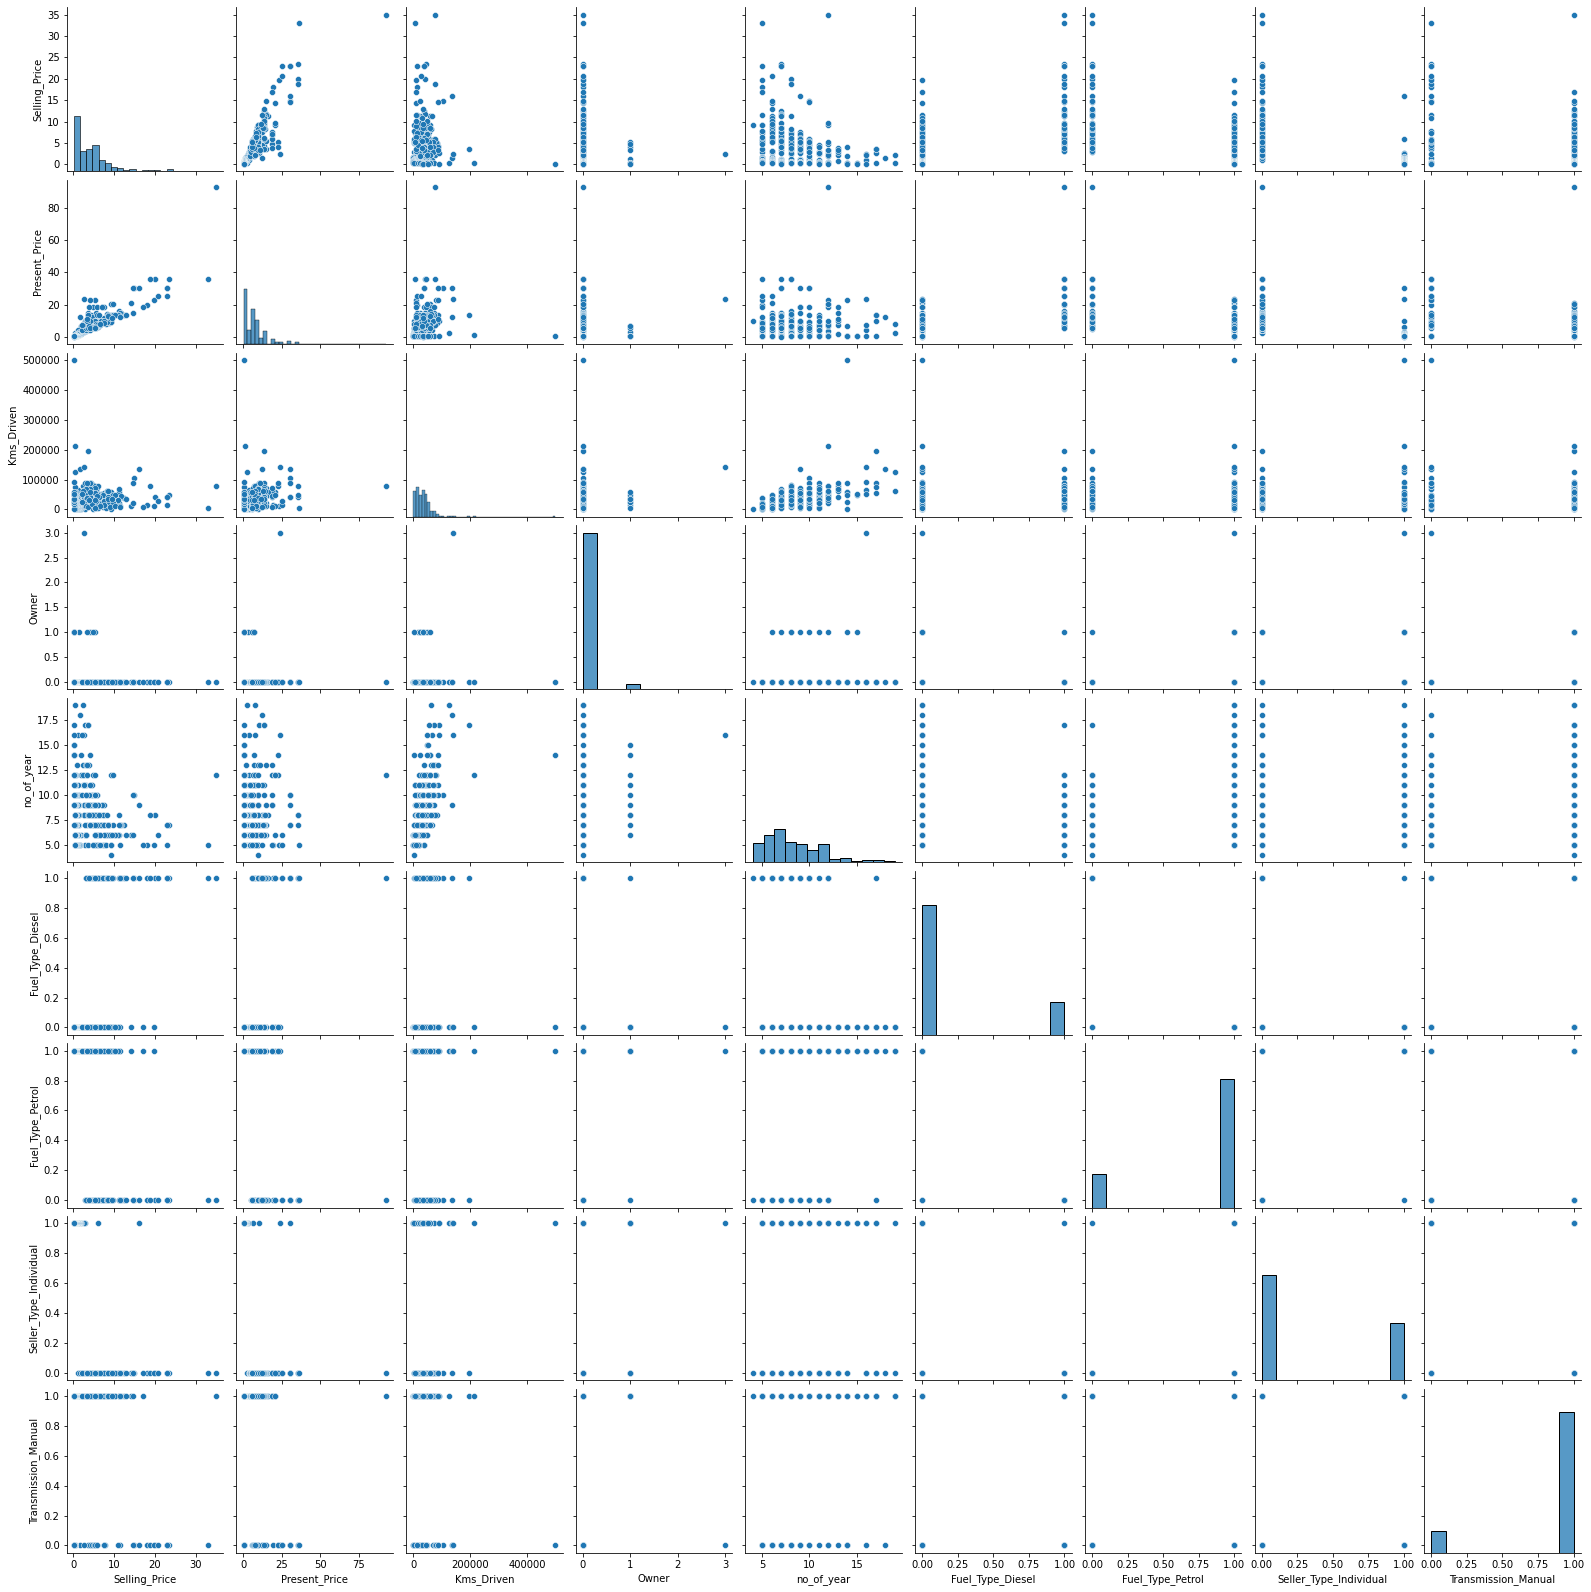

In [ ]:
import seaborn as sns
#plotting in form of pairplot using seaborn
sns.pairplot(final_dataset)

In [ ]:
#independent and dependent feautre
x=final_dataset.iloc[:,1:] #from 1st col = independent
y=final_dataset.iloc[:,0] #first as dependent

In [ ]:
x.head()

,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(240, 8)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [ ]:
import numpy as np
#hypeparametes
n_estimators=[int(x) for x in np.linspace(start=100, stop = 1200, num = 12)] 
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#first create the base model to tune
rf=RandomForestRegressor()

In [ ]:
#applying randimize search cv
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, scoring='neg_mean_squared_error',n_iter=10, cv=5, verbose=2, random_state=42,n_jobs=1)

In [ ]:
rf_random.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
prediction=rf_random.predict(x_test)

In [ ]:
prediction

array([ 0.3583,  5.2288,  8.6604,  1.555 ,  1.1764,  5.2329,  0.3305,
        4.7845,  4.219 ,  2.6015,  2.922 ,  0.8053, 10.2285,  5.2459,
        0.4249,  0.2142,  1.144 ,  6.037 ,  3.971 ,  4.0639,  0.7048,
        2.857 , 15.0204,  0.2457,  7.8805,  4.1935,  4.3345,  3.9905,
        5.149 ,  7.3655,  2.2765,  0.456 ,  0.2714,  3.2735,  1.1812,
        5.2268,  4.8889,  5.1415,  4.6775, 19.1748,  1.1831,  5.177 ,
        5.911 ,  0.3463,  3.1537,  2.376 ,  0.4647, 14.6703,  2.9275,
        5.746 ,  3.253 ,  0.4153,  7.378 ,  0.1927, 20.7582,  5.2246,
        5.348 ,  2.4835, 10.861 ,  7.7821,  2.625 ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


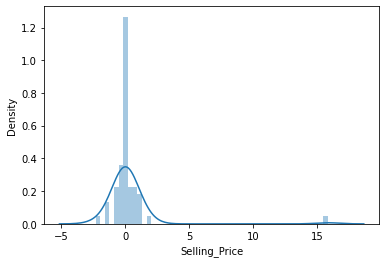

In [ ]:
import seaborn as sns
sns.distplot(y_test-prediction)

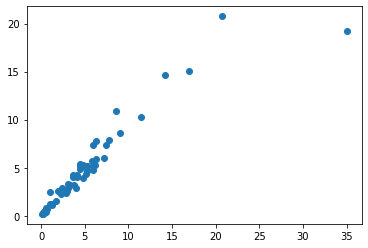

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.7062967213114754
MSE: 4.574107365737702
RMSE: 2.138716289211288
